In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt

Problem: Life in Lower Dimensions

You are provided with a [dataset](https://drive.google.com/file/d/1wOp8K9BS8Ncmjz7aP8RdqukqkGNSwK4i/view?usp=drive_link) of 1797 images - each image is 8x8 pixels and provided as a feature vector of length 64. You will try your hands at transforming this dataset to a lower-dimensional space using PCA clustering the images in this reduced space.

Run the PCA algorithm on the given dataset. Plot the cumulative percentage variance explained by the principal components. Report the number of principal components that contribute to 90% of the variance in the dataset.

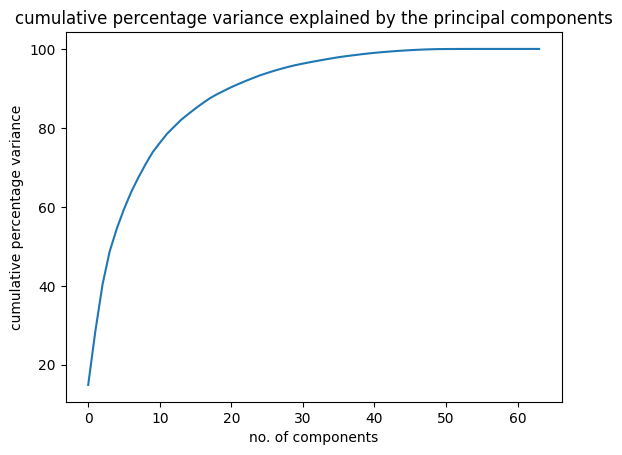


number of principal components that contribute to 90% of the variance in the datase = 21


In [2]:
# Cell type : CodeWrite
# write the function for PCA clustering here.
def PCA(Data):
    """ Computes the likelihood score of a data point with respect to a given class
    given the class' mean and covariance matrix

    Arguments:
    Data: Dataset



    Returns:
    numPCs: number of principal components that contribute to 90% of the varaince in the dataset.

    """

    return numPCs

data = np.load('Data.npz')
X = data['arr_0'].T
mean = np.mean(X,axis =1)
(d,n) = X.shape

def find_cov(X1, mean1,d,n):
  mean1 = mean1.reshape((d,1))
  cov1 = mean1 @ mean1.T
  cov2 = (X1 @ X1.T/n)
  return cov2 - cov1


from numpy import linalg
import matplotlib.pyplot as plt

def find_var_exp(cov,d):
  w,v = linalg.eig(cov)
  # plt.plot(w)
  var_exp=0
  var_exp_rat= [0 for i in range(d)]
  tot_sum = np.sum(w)
  # for i in range(d):
  #   var_exp += w[i]
  #   var_exp_rat = var_exp/tot_sum
  #   if var_exp_rat >=0.9:
  #     break
  for i in range(d):
    var_exp += w[i]
    var_exp_rat[i] = var_exp/tot_sum
  var_exp_rat = np.array(var_exp_rat)
  numPCs = np.argmax(np.array(var_exp_rat)>=0.9)+1
  return [numPCs, w,v,var_exp_rat]

cov = find_cov(X,mean,d,n)
cov1 = np.cov(X)
[numPCs, var, vec, var_exp_rat] =find_var_exp(cov1,d)

plt.plot(var_exp_rat*100)
plt.title('cumulative percentage variance explained by the principal components')
plt.xlabel('no. of components')
plt.ylabel('cumulative percentage variance')
plt.show()
print()
print('number of principal components that contribute to 90% of the variance in the datase = {}'.format(numPCs))

4b)  Perform reconstruction of data using the dimensionality-reduced data considering the number of dimensions [2,4,8,16]. Report the Mean Square Error (MSE) between the original data and reconstructed data, and interpret the optimal dimensions $\hat{d}$ based on the MSE values.

Error for PC2   858.9447808487329
Error for PC4   616.1911300562695
Error for PC8   391.7947361149765
Error for PC16   180.93970325737862


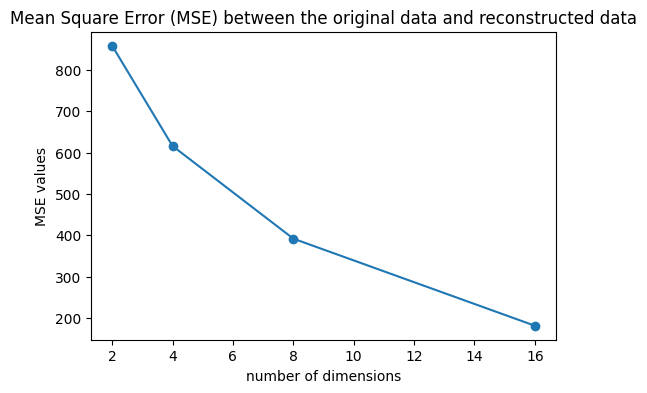

the optimal dimensions d based on the MSE values is 16 as it gives minimum MSE value


In [3]:
# Cell type : CodeWrite
# Write the code for data reconstruction, run the algorithm for dimensions.

def reconstructed_data(X,vec,mean,i,n):
  v_new = vec[:,:i]
  recon_mat = X.T @ v_new
  X_new = v_new @ recon_mat.T
  # error= [0 for k in range(n)]

  sum_v = np.sum(vec[:,i:], axis=1)
  b_V = (vec[:,i:] @ vec[:,i:].T)@ mean

  error = linalg.norm(X.T-(X_new.T+b_V), axis=1)**2
  err1 = np.sum(error)/n
  err2 = ((X.T - X_new.T-b_V) ** 2).mean()
  return [X_new,err1,err2,b_V]

x=[]
error1 =[]
error2 =[]
for k in range(1,5):
  i = 1<<k
  [X_new,err1,err2,b_V] = reconstructed_data(X,vec,mean,i,n)
  X_new-X
  print ("Error for PC{}".format(i),' ',err1)
  error1.append(err1)
  error2.append(err2)
  x.append(i)
plt.figure(figsize=(6,4))
plt.plot(x,error1, marker='o')
plt.title('Mean Square Error (MSE) between the original data and reconstructed data')
plt.xlabel('number of dimensions')
plt.ylabel('MSE values')
plt.show()

print('the optimal dimensions d based on the MSE values is {} as it gives minimum MSE value'.format(16))
